# Obesity Classification

## Import libraries

In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

## Data preprocessing

In [2]:
# read the .csv into a dataframe
data = pd.read_csv('https://raw.githubusercontent.com/annie-jiang/obesity-classification/main/obesity.csv')

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# 2111 rows, 17 columns
data.shape

(2111, 17)

In [5]:
# check for missing values
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Data visualization

### Pairplot

C:\Users\annie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


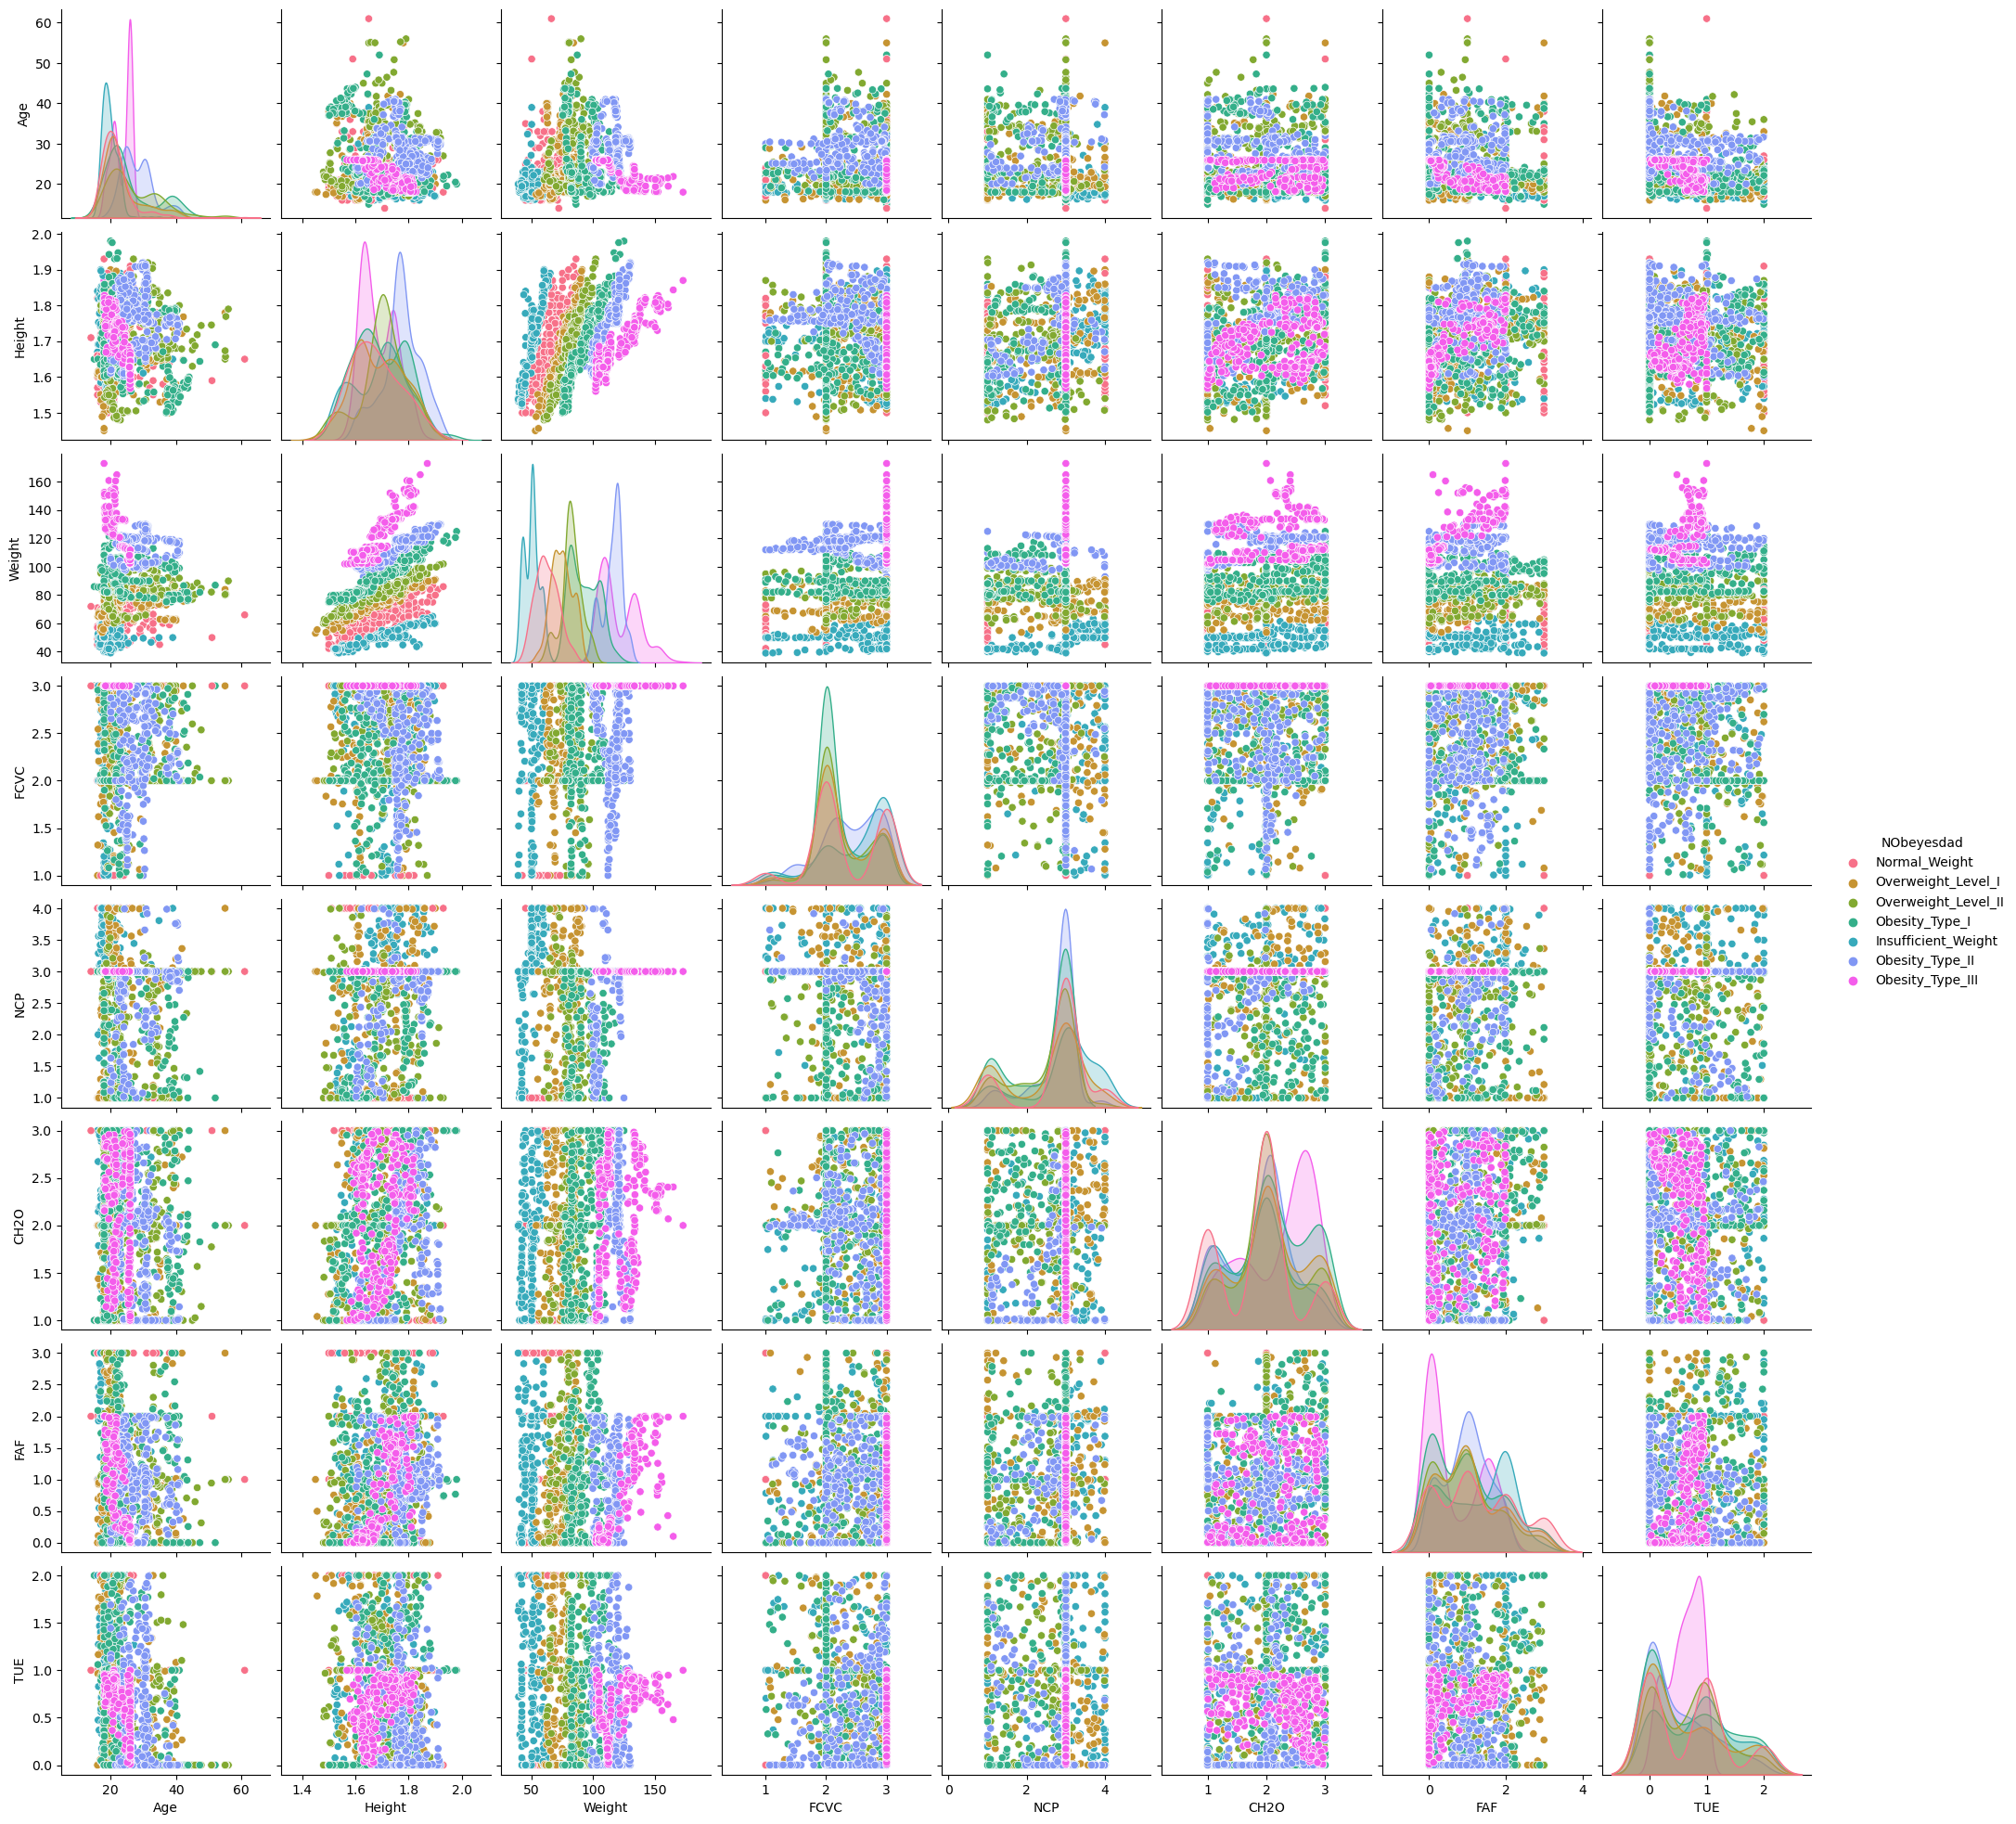

In [8]:
sns.pairplot(data, hue='NObeyesdad', palette='husl')
plt.show()

### Correlation Matrix

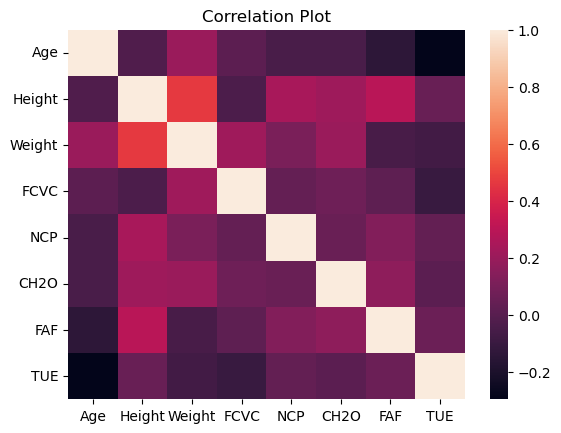

In [9]:
subset = data[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]

sns.heatmap(subset.corr())
plt.title('Correlation Plot')
plt.show()

### Gender distribution by obesity level

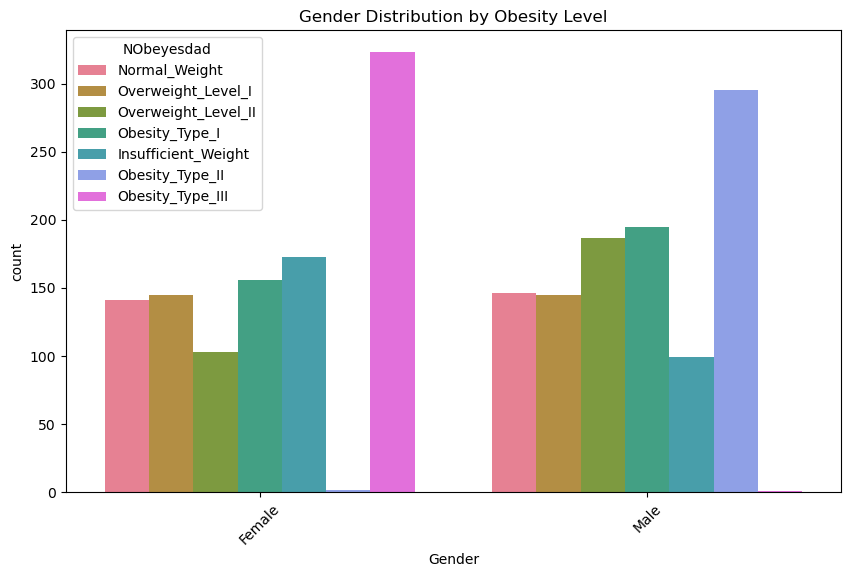

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='NObeyesdad', data=data, palette='husl')
plt.title('Gender Distribution by Obesity Level')
plt.xticks(rotation=45)
plt.show()

In [11]:
# check obesity type ii and obesity type iii
print(data.groupby(['Gender', 'NObeyesdad']).size().unstack(fill_value=0))

NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Gender                                                           
Female                      173            141             156   
Male                         99            146             195   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Gender                                                              
Female                    2               323                 145   
Male                    295                 1                 145   

NObeyesdad  Overweight_Level_II  
Gender                           
Female                      103  
Male                        187  


## Prepare the data for classification methods

In [12]:
# encode categorical columns
encoder = OneHotEncoder(sparse=False)
categorical_columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']

# fit and transform the categorical columns
encoded_data = encoder.fit_transform(data[categorical_columns])

# convert encoded columns back to dataframe
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# reset index to ensure proper concatenation
data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concatenate the encoded columns with the original dataframe
data = pd.concat([data.drop(columns=categorical_columns), encoded_df], axis=1)

C:\Users\annie\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# standardize numerical columns
sc = StandardScaler()
numerical_columns = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']

scaled_data = sc.fit_transform(data[numerical_columns])

# convert standardized columns back to dataframe
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# combine the scaled features with the original dataframe and drop the original numerical columns
data = data.drop(columns=numerical_columns).reset_index(drop=True)
data = pd.concat([data, scaled_df], axis=1)

In [14]:
# separate features and label
y = data[['NObeyesdad']].values
x = data.drop(columns=['NObeyesdad']).values

In [15]:
# divide data into training and test sets (70:30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

## Fitting models to training dataset

In [16]:
# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train.ravel())

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())

# SVMs
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', probability=True).fit(x_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo', probability=True).fit(x_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo', probability=True).fit(x_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo', probability=True).fit(x_train, y_train.ravel())

# decision tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.get_params()
y_pred_dt = dt.predict(x_test)

# random forest
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(x_train,y_train.ravel())

# logistic regression
lg = LogisticRegression(random_state=0, max_iter=500)
lg.fit(x_train,y_train.ravel())

LogisticRegression(max_iter=500, random_state=0)

## 5-Fold Cross-Validation

The average accuracy for KNN is 80.3%.
The average accuracy for Naive Bayes is 47.93%.
The average accuracy for Linear SVM is 93.97%.
The average accuracy for RBF SVM is 77.59%.
The average accuracy for Poly SVM is 90.25%.
The average accuracy for Sigmoid SVM is 50.91%.
The average accuracy for Decision Tree is 91.13%.
The average accuracy for Random Forest is 88.9%.
The average accuracy for Logistic Regression is 85.85%.


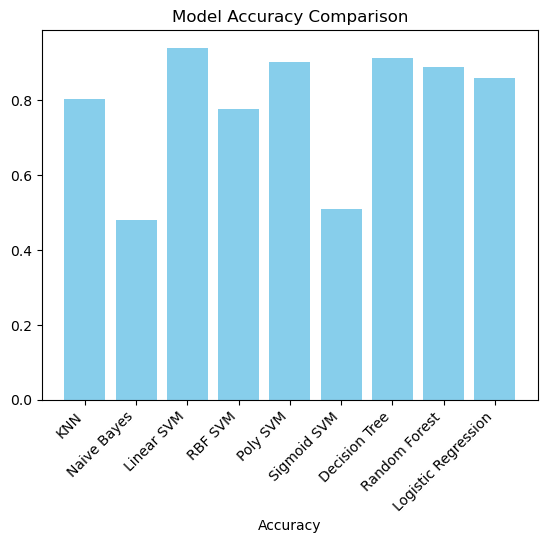

In [17]:
classifiers = {
    'KNN': knn,
    'Naive Bayes': gnb,
    'Linear SVM': linear,
    'RBF SVM': rbf,
    'Poly SVM': poly,
    'Sigmoid SVM': sig,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Logistic Regression': lg
}

k = 5
kf = KFold(n_splits=k)

# store the mean accuracies
accuracies = {}

for name, clf in classifiers.items():
    result = cross_val_score(clf, x_train, y_train.ravel(), cv=kf, scoring='accuracy')
    accuracies[name] = result.mean()
    print(f'The average accuracy for {name} is {round(result.mean() * 100,2)}%.')

# plot the accuracies
fig, ax = plt.subplots()
ax.bar(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
ax.set_xlabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')

plt.show()

## Classification Reports

In [18]:
# predicting test set results for knn
y_pred_knn = knn.predict(x_test)

print(classification_report(y_test, y_pred_knn))

                     precision    recall  f1-score   support

Insufficient_Weight       0.78      0.93      0.85        90
      Normal_Weight       0.76      0.43      0.54        87
     Obesity_Type_I       0.80      0.92      0.86       103
    Obesity_Type_II       0.93      1.00      0.96        90
   Obesity_Type_III       0.99      1.00      1.00       101
 Overweight_Level_I       0.73      0.74      0.74        81
Overweight_Level_II       0.81      0.76      0.78        82

           accuracy                           0.83       634
          macro avg       0.83      0.83      0.82       634
       weighted avg       0.83      0.83      0.82       634



In [19]:
# gnb
y_pred_gnb = gnb.predict(x_test)

print(classification_report(y_test, y_pred_gnb))

                     precision    recall  f1-score   support

Insufficient_Weight       0.32      0.97      0.48        90
      Normal_Weight       0.56      0.22      0.31        87
     Obesity_Type_I       0.57      0.31      0.40       103
    Obesity_Type_II       0.60      0.94      0.73        90
   Obesity_Type_III       0.99      0.99      0.99       101
 Overweight_Level_I       0.47      0.10      0.16        81
Overweight_Level_II       0.38      0.04      0.07        82

           accuracy                           0.53       634
          macro avg       0.55      0.51      0.45       634
       weighted avg       0.57      0.53      0.47       634



In [20]:
# linear svm
svm_linear_pred = linear.predict(x_test)

print(classification_report(y_test, svm_linear_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.99      0.95        90
      Normal_Weight       0.99      0.86      0.92        87
     Obesity_Type_I       0.97      0.99      0.98       103
    Obesity_Type_II       1.00      0.99      0.99        90
   Obesity_Type_III       1.00      1.00      1.00       101
 Overweight_Level_I       0.90      0.93      0.91        81
Overweight_Level_II       0.92      0.93      0.92        82

           accuracy                           0.96       634
          macro avg       0.96      0.95      0.95       634
       weighted avg       0.96      0.96      0.96       634



In [21]:
# poly svm
svm_poly_pred = poly.predict(x_test)

print(classification_report(y_test, svm_poly_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        90
      Normal_Weight       0.84      0.83      0.83        87
     Obesity_Type_I       0.93      0.97      0.95       103
    Obesity_Type_II       1.00      1.00      1.00        90
   Obesity_Type_III       1.00      1.00      1.00       101
 Overweight_Level_I       0.84      0.81      0.82        81
Overweight_Level_II       0.85      0.84      0.85        82

           accuracy                           0.92       634
          macro avg       0.92      0.92      0.92       634
       weighted avg       0.92      0.92      0.92       634



In [22]:
# sigmoid svm
svm_sig_pred = sig.predict(x_test)

print(classification_report(y_test, svm_sig_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.48      0.57      0.52        90
      Normal_Weight       0.34      0.30      0.32        87
     Obesity_Type_I       0.33      0.44      0.38       103
    Obesity_Type_II       0.53      0.51      0.52        90
   Obesity_Type_III       0.96      1.00      0.98       101
 Overweight_Level_I       0.53      0.35      0.42        81
Overweight_Level_II       0.41      0.35      0.38        82

           accuracy                           0.51       634
          macro avg       0.51      0.50      0.50       634
       weighted avg       0.52      0.51      0.51       634



In [23]:
# rbf svm
svm_rbf_pred = rbf.predict(x_test)

print(classification_report(y_test, svm_rbf_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.71      0.83        90
      Normal_Weight       0.43      0.94      0.59        87
     Obesity_Type_I       0.97      0.82      0.88       103
    Obesity_Type_II       1.00      0.91      0.95        90
   Obesity_Type_III       1.00      0.99      1.00       101
 Overweight_Level_I       0.90      0.57      0.70        81
Overweight_Level_II       0.95      0.70      0.80        82

           accuracy                           0.81       634
          macro avg       0.89      0.80      0.82       634
       weighted avg       0.90      0.81      0.83       634



In [24]:
# decision tree
dt_pred = dt.predict(x_test)

print(classification_report(y_test, dt_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.96      0.94        90
      Normal_Weight       0.86      0.83      0.84        87
     Obesity_Type_I       0.93      0.97      0.95       103
    Obesity_Type_II       0.97      0.98      0.97        90
   Obesity_Type_III       1.00      0.99      1.00       101
 Overweight_Level_I       0.87      0.83      0.85        81
Overweight_Level_II       0.89      0.89      0.89        82

           accuracy                           0.92       634
          macro avg       0.92      0.92      0.92       634
       weighted avg       0.92      0.92      0.92       634



In [25]:
# random forest
rf_pred = rf.predict(x_test)

print(classification_report(y_test, rf_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.93      0.93        90
      Normal_Weight       0.75      0.82      0.78        87
     Obesity_Type_I       0.87      0.94      0.91       103
    Obesity_Type_II       1.00      0.99      0.99        90
   Obesity_Type_III       1.00      1.00      1.00       101
 Overweight_Level_I       0.85      0.78      0.81        81
Overweight_Level_II       0.95      0.84      0.89        82

           accuracy                           0.91       634
          macro avg       0.91      0.90      0.90       634
       weighted avg       0.91      0.91      0.91       634



In [26]:
# random forest
lg_pred = lg.predict(x_test)

print(classification_report(y_test, lg_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.98      0.93        90
      Normal_Weight       0.87      0.79      0.83        87
     Obesity_Type_I       0.93      0.92      0.93       103
    Obesity_Type_II       0.97      1.00      0.98        90
   Obesity_Type_III       0.97      1.00      0.99       101
 Overweight_Level_I       0.84      0.78      0.81        81
Overweight_Level_II       0.82      0.82      0.82        82

           accuracy                           0.90       634
          macro avg       0.90      0.90      0.90       634
       weighted avg       0.90      0.90      0.90       634



### Classification Metrics Graph

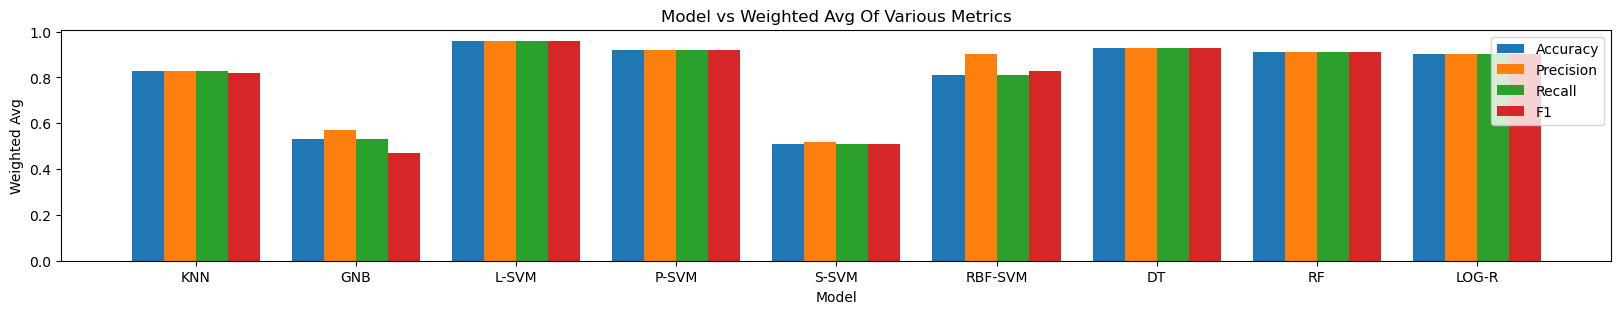

In [27]:
# models
x = ['KNN','GNB','L-SVM','P-SVM','S-SVM','RBF-SVM','DT','RF','LOG-R']

accuracy = [0.83, 0.53, 0.96, 0.92, 0.51, 0.81, 0.93, 0.91, 0.90]
precision = [0.83, 0.57, 0.96, 0.92, 0.52, 0.90, 0.93, 0.91, 0.90]
recall = [0.83, 0.53, 0.96, 0.92, 0.51, 0.81, 0.93, 0.91, 0.90]
f1 = [0.82, 0.47, 0.96, 0.92, 0.51, 0.83, 0.93, 0.91, 0.90]

# number of bars
n_bars = len(x)

# number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# total width for each group of bars
total_width = 0.8

# width for each individual bar within a group
bar_width = total_width / n_groups

# calculate the center positions for each group of bars
x_axis = np.arange(len(x))

# calculate the left positions for each individual bar within a group
left_positions = x_axis - (total_width - bar_width) / 2

# set the size of the graph
plt.rcParams["figure.figsize"] = (20, 3)

# plot the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# set the range of values for the x axis and labels
plt.xticks(x_axis, x)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()


In [28]:
# save the trained model and the scaler to files
with open('obesity_linear_svm.pkl', 'wb') as f:
    pickle.dump(linear, f)

with open('obesity_scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)